# Random Forest - Production - NoClassBalancing

In [23]:
import pandas as pd
from sklearn.preprocessing import LabelEncoder
# from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
import matplotlib as plt

In [24]:
file = "MLCleanData.csv"
full_results_df = pd.read_csv(file)
full_results_df

,res_state,age_group,sex,race,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,No,No,Yes,NaN
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,No,No,No,Yes,NaN
2,IA,0 - 17 years,Male,White,Symptomatic,No,No,No,Yes,NaN
3,KS,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,NaN
4,OH,18 to 49 years,Male,White,Symptomatic,No,No,No,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...
222339,NC,18 to 49 years,Male,White,Symptomatic,Yes,No,No,Yes,NaN
222340,NC,65+ years,Male,White,Symptomatic,Yes,Yes,Yes,Yes,NaN
222341,OK,18 to 49 years,Male,White,Symptomatic,No,No,No,No,NaN
222342,OK,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,NaN


In [25]:
full_results_df = full_results_df.loc[full_results_df['res_state']!='GU',:]
full_results_df

,res_state,age_group,sex,race,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,No,No,Yes,NaN
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,No,No,No,Yes,NaN
2,IA,0 - 17 years,Male,White,Symptomatic,No,No,No,Yes,NaN
3,KS,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,NaN
4,OH,18 to 49 years,Male,White,Symptomatic,No,No,No,Yes,NaN
...,...,...,...,...,...,...,...,...,...,...
222339,NC,18 to 49 years,Male,White,Symptomatic,Yes,No,No,Yes,NaN
222340,NC,65+ years,Male,White,Symptomatic,Yes,Yes,Yes,Yes,NaN
222341,OK,18 to 49 years,Male,White,Symptomatic,No,No,No,No,NaN
222342,OK,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,NaN


In [26]:
# Make a copy and Add the empty column "outcome"
results_df = full_results_df.copy()

results_df["outcome"]=""
results_df

,res_state,age_group,sex,race,symptom_status,hosp_yn,icu_yn,death_yn,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,No,No,Yes,
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,No,No,No,Yes,
2,IA,0 - 17 years,Male,White,Symptomatic,No,No,No,Yes,
3,KS,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,
4,OH,18 to 49 years,Male,White,Symptomatic,No,No,No,Yes,
...,...,...,...,...,...,...,...,...,...,...
222339,NC,18 to 49 years,Male,White,Symptomatic,Yes,No,No,Yes,
222340,NC,65+ years,Male,White,Symptomatic,Yes,Yes,Yes,Yes,
222341,OK,18 to 49 years,Male,White,Symptomatic,No,No,No,No,
222342,OK,18 to 49 years,Female,White,Symptomatic,No,No,No,Yes,


In [27]:
# Populate "outcome" column
for idx, row in results_df.iterrows():
    if row['death_yn'] == "Yes":
        row['outcome'] = "severe"
 
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "mild"
           
    elif row['hosp_yn'] != "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"
        
    elif row['hosp_yn'] == "Yes" and row['icu_yn'] != "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"

    elif row['hosp_yn'] == "Yes" and row['icu_yn'] == "Yes" and row['death_yn'] != "Yes":
        row['outcome'] = "severe"
    
    else:
        row['outcome'] = "mild"


# Print the contents and counts of the "outcome" column
outcome_counts = results_df.outcome.value_counts()
print(outcome_counts)

mild      193292
severe     29029
Name: outcome, dtype: int64


In [28]:
results_df = results_df.drop(['hosp_yn'], axis=1)
results_df = results_df.drop(['icu_yn'], axis=1)
results_df = results_df.drop(['death_yn'], axis=1)
#results_df = results_df.drop(['res_state'], axis=1)
results_df

,res_state,age_group,sex,race,symptom_status,underlying_conditions_yn,outcome
0,IA,50 to 64 years,Male,White,Symptomatic,Yes,severe
1,OH,18 to 49 years,Female,Multiple/Other,Symptomatic,Yes,mild
2,IA,0 - 17 years,Male,White,Symptomatic,Yes,mild
3,KS,18 to 49 years,Female,White,Symptomatic,Yes,mild
4,OH,18 to 49 years,Male,White,Symptomatic,Yes,mild
...,...,...,...,...,...,...,...
222339,NC,18 to 49 years,Male,White,Symptomatic,Yes,severe
222340,NC,65+ years,Male,White,Symptomatic,Yes,severe
222341,OK,18 to 49 years,Male,White,Symptomatic,No,mild
222342,OK,18 to 49 years,Female,White,Symptomatic,Yes,mild


In [29]:
# Print the contents and counts of the "outcome" column
age_group_counts = results_df.age_group.value_counts()
print(age_group_counts)
print("")

sex_counts = results_df.sex.value_counts()
print(sex_counts)
print("")

race_counts = results_df.race.value_counts()
print(race_counts)
print("")

#exp_counts = results_df.exposure_yn.value_counts()
#print(exp_counts)
#print("")

symptom_counts = results_df.symptom_status.value_counts()
print(symptom_counts)
print("")

condition_counts = results_df.underlying_conditions_yn.value_counts()
print(condition_counts)
print("")

outcome_counts = results_df.outcome.value_counts()
print(outcome_counts)

18 to 49 years    105329
50 to 64 years     51900
65+ years          49704
0 - 17 years       15388
Name: age_group, dtype: int64

Female    127129
Male       95192
Name: sex, dtype: int64

White                                     191069
Black                                      20532
Multiple/Other                              5372
Asian                                       3903
Native Hawaiian/Other Pacific Islander      1079
American Indian/Alaska Native                366
Name: race, dtype: int64

Symptomatic     214356
Asymptomatic      7965
Name: symptom_status, dtype: int64

Yes    202763
No      19558
Name: underlying_conditions_yn, dtype: int64

mild      193292
severe     29029
Name: outcome, dtype: int64


In [30]:
# Bar graph of outcome
import numpy as np
import matplotlib.pyplot as plt

# creating the dataset
mild = results_df['outcome']=='mild'
mild = results_df[results_df['outcome']=='mild']
mild = mild['outcome'].count()

severe = results_df['outcome']=='severe'
severe = results_df[results_df['outcome']=='severe']
severe = severe['outcome'].count()

outcome = {"Mild": mild, "Severe": severe}
category = list(outcome.keys())
count = list(outcome.values())
print(category)
print(count)

['Mild', 'Severe']
[193292, 29029]


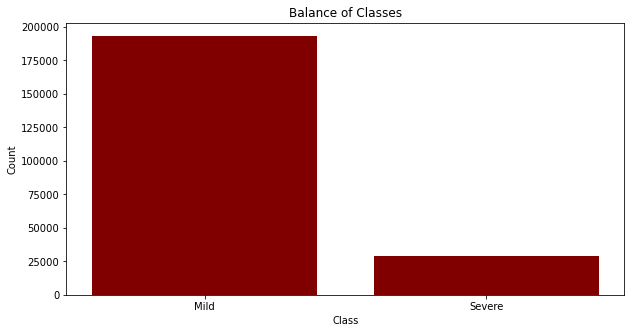

In [31]:
fig = plt.figure(figsize = (10, 5))
 
# creating the bar plot
plt.bar(category, count, color = 'maroon')
 
plt.xlabel("Class")
plt.ylabel("Count")
plt.title("Balance of Classes")
plt.show()

In [32]:
part_encoded_df = results_df.copy()

# Encode with "get_dummies"
part_encoded_df = pd.get_dummies(part_encoded_df, columns=['res_state','race'])

# Encode "outcome"
le=LabelEncoder()

age_num={'0 - 17 years': 0, '18 to 49 years': 1, '50 to 64 years': 2, '65+ years': 3, 'Missing': 4}
part_encoded_df['age_num']=part_encoded_df['age_group'].apply(lambda x: age_num[x])

outcome_num={'mild': 0, 'severe': 1}
part_encoded_df['outcome_num']=part_encoded_df['outcome'].apply(lambda x: outcome_num[x])

part_encoded_df['sex'] = le.fit_transform(part_encoded_df['sex'])
part_encoded_df['symptom_status'] = le.fit_transform(part_encoded_df['symptom_status'])
part_encoded_df['underlying_conditions_yn'] = le.fit_transform(part_encoded_df['underlying_conditions_yn'])

results_encoded_df = part_encoded_df.copy()
results_encoded_df

,age_group,sex,symptom_status,underlying_conditions_yn,outcome,res_state_AK,res_state_AL,res_state_AR,res_state_CO,res_state_DC,...,res_state_WI,res_state_WY,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_Native Hawaiian/Other Pacific Islander,race_White,age_num,outcome_num
0,50 to 64 years,1,1,1,severe,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
1,18 to 49 years,0,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,0 - 17 years,1,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,18 to 49 years,0,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,18 to 49 years,1,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222339,18 to 49 years,1,1,1,severe,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
222340,65+ years,1,1,1,severe,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,1
222341,18 to 49 years,1,1,0,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
222342,18 to 49 years,0,1,1,mild,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [33]:
# Drop le encoded columns
results_encoded_df = results_encoded_df.drop(['age_group'], axis=1)
results_encoded_df = results_encoded_df.drop(['outcome'], axis=1)

In [34]:
results_encoded_df

,sex,symptom_status,underlying_conditions_yn,res_state_AK,res_state_AL,res_state_AR,res_state_CO,res_state_DC,res_state_FL,res_state_GA,...,res_state_WI,res_state_WY,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_Native Hawaiian/Other Pacific Islander,race_White,age_num,outcome_num
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,2,1
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,1,0
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222339,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,1
222340,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,3,1
222341,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0
222342,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,1,0


In [35]:
results_encoded_df.to_csv('results_encoded.csv', index=False)

In [13]:
X = results_encoded_df.copy()
X = X.drop("outcome_num", axis=1)
X

,sex,symptom_status,underlying_conditions_yn,res_state_AK,res_state_AL,res_state_AR,res_state_CO,res_state_DC,res_state_FL,res_state_GA,...,res_state_WA,res_state_WI,res_state_WY,race_American Indian/Alaska Native,race_Asian,race_Black,race_Multiple/Other,race_Native Hawaiian/Other Pacific Islander,race_White,age_num
0,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,2
1,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,1
2,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
4,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
222339,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
222340,1,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,3
222341,1,1,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1
222342,0,1,1,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,1


In [14]:
y = results_encoded_df["outcome_num"].values
y

array([1, 0, 0, ..., 0, 0, 0], dtype=int64)

In [15]:
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y)
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(166740, 48)
(55581, 48)
(166740,)
(55581,)


In [16]:
# Create Scaler instance and fit with training data

# scaler = StandardScaler().fit(X_train)
# X_scaler = scaler.fit(X_train)
# X_train_scaled = scaler.transform(X_train)
# X_test_scaled = scaler.transform(X_test)

# min_max_scaler = MinMaxScaler()
# X_train_scaled = min_max_scaler.fit_transform(X_train)
# X_test_scaled = min_max_scaler.fit_transform(X_test)

# Random Forest Model

In [17]:
# Create the model
rf_model=RandomForestClassifier(n_estimators=128)

# Fit the model
rf_model = rf_model.fit(X_train, y_train)
print("Training Data Score: %.3f" % rf_model.score(X_train, y_train))
print("Test Data Score: %.3f" % rf_model.score(X_test, y_test))

# Predictions
predictions = rf_model.predict(X_test)

Training Data Score: 0.907
Test Data Score: 0.907


In [18]:
# Confusion Matrix
cm = confusion_matrix(y_test, predictions)
cm_df=pd.DataFrame(cm)
cm_df=pd.DataFrame(
    cm, index=["Actual Mild", "Actual Severe"],
    columns=["Predicted Mild", "Predicted Severe"])
cm_df

,Predicted Mild,Predicted Severe
Actual Mild,48177,147
Actual Severe,5049,2208


In [19]:
acc_score=accuracy_score(y_test, predictions)
acc_score

0.906514816214174

In [20]:
print(classification_report(y_test, predictions))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95     48324
           1       0.94      0.30      0.46      7257

    accuracy                           0.91     55581
   macro avg       0.92      0.65      0.70     55581
weighted avg       0.91      0.91      0.88     55581



In [21]:
# Calculate feature importance in the Random Forest Model
importance = rf_model.feature_importances_
importance

array([6.93540583e-03, 8.81618719e-03, 1.51883578e-02, 9.49304971e-04,
       1.63229306e-05, 5.86063160e-05, 2.28893223e-03, 3.35299873e-03,
       2.78516733e-04, 6.70199373e-05, 8.66531451e-03, 2.11607280e-02,
       1.36547750e-04, 8.42070696e-03, 1.77655150e-01, 1.31229425e-02,
       2.64202646e-05, 3.40974709e-01, 2.04922352e-05, 1.50773614e-04,
       2.26445166e-05, 3.52230924e-02, 6.34324394e-05, 1.31904005e-02,
       2.00813621e-05, 8.72348300e-03, 8.22865112e-03, 1.40702949e-02,
       1.10697727e-05, 0.00000000e+00, 8.31875395e-03, 5.19503201e-04,
       1.01494590e-04, 5.60355752e-03, 1.47516366e-02, 6.69784897e-05,
       9.29098128e-04, 6.04420318e-03, 5.28790643e-03, 2.59318566e-06,
       9.29511566e-03, 5.05965362e-04, 1.03468096e-03, 5.07654710e-03,
       1.57896475e-03, 1.05455010e-03, 5.10892530e-03, 2.46880937e-01])

In [22]:
# Sort the features by importance
sorted(zip(rf_model.feature_importances_, X.columns), reverse=True)

[(0.3409747094331229, 'res_state_MN'),
 (0.2468809370334866, 'age_num'),
 (0.17765515037627325, 'res_state_KY'),
 (0.03522309242190497, 'res_state_NC'),
 (0.021160728022041997, 'res_state_ID'),
 (0.015188357832024019, 'underlying_conditions_yn'),
 (0.014751636589753566, 'res_state_UT'),
 (0.014070294931190547, 'res_state_OH'),
 (0.01319040050559231, 'res_state_NJ'),
 (0.01312294253181168, 'res_state_LA'),
 (0.009295115661566261, 'res_state_WY'),
 (0.008816187190594908, 'symptom_status'),
 (0.00872348300433324, 'res_state_NV'),
 (0.008665314509533189, 'res_state_IA'),
 (0.008420706960774597, 'res_state_KS'),
 (0.008318753951356159, 'res_state_PA'),
 (0.008228651119000568, 'res_state_NY'),
 (0.00693540583278921, 'sex'),
 (0.006044203184086115, 'res_state_VT'),
 (0.005603557521083529, 'res_state_TN'),
 (0.005287906427840326, 'res_state_WA'),
 (0.005108925303648851, 'race_White'),
 (0.005076547103060679, 'race_Black'),
 (0.0033529987264276384, 'res_state_DC'),
 (0.002288932227220182, 'res_